In [8]:
"""
Add path for code repository
"""
import sys
sys.path.insert(0, "C:\\code\\python_for_the_financial_economist")

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""
    
# numpy for vector and matrix calculations + simulation
import numpy as np

# pandas 
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# pandas datareader for getting data from different APIs 
import pandas_datareader as pdr

# packages for working with dates and time
import datetime

"""
Load own functions/packages
"""

# set plotting style
from codelib.visualization.layout import DefaultStyle
DefaultStyle();

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Sources

## Overview 

There exists a number af data sources which are freely available. Python packages include

* `yfinance`
* `pandas_datareader`
* `fredapi`

Other data sources include

* FRED yield curve data
* Macroeconomic predictors
* WRDS, CRSP and Compustat [not free]

This notebook shows how to obtain the different data sources used in the course. We will either use different APIs provided by the Python community or load data directly from the `..\data` folder. 


# FRED API
`fredapi` is a Python API for the FRED data provided by the[ Federal Reserve Bank of St. Loui](https://fred.stlouisfed.org/)s. fredapi provides a wrapper in python to the FRED web service, and also provides several conveninent methods for parsing and analyzing point-in-time data (i.e. historic data revisions) from ALFRE.D

fredapi makes use of pandas and returns data to you in a pandseries or dataframe.)



In [9]:
# import fred package
from fredapi import Fred

# get API Key saved as an environment variable
import os 
api_key = os.getenv('fred_key')
fred = Fred(api_key=api_key) #<- you have to use your own  API key

In [10]:
?fred.get_series

Signature:
fred.get_series(
    series_id,
    observation_start=None,
    observation_end=None,
    **kwargs,
)
Docstring:
Get data for a Fred series id. This fetches the latest known data, and is equivalent to get_series_latest_release()

Parameters
----------
series_id : str
    Fred series id such as 'CPIAUCSL'
observation_start : datetime or datetime-like str such as '7/1/2014', optional
    earliest observation date
observation_end : datetime or datetime-like str such as '7/1/2014', optional
    latest observation date
kwargs : additional parameters
    Any additional parameters supported by FRED. You can see https://api.stlouisfed.org/docs/fred/series_observations.html for the full list

Returns
-------
data : Series
    a Series where each index is the observation date and the value is the data for the Fred series
File:      c:\users\johan\anaconda3\envs\fin_econ_2025\lib\site-packages\fredapi\fred.py
Type:      method

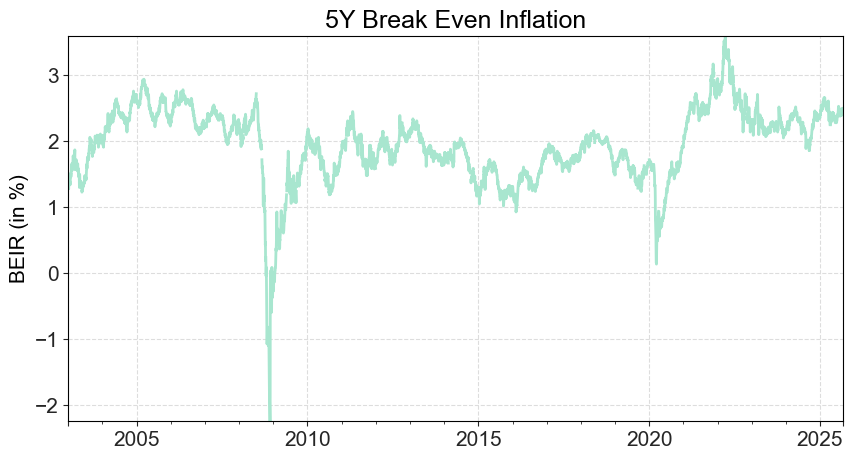

In [11]:
"""
Federal Reserve Economic Data

Break-Even Inflation (BEIR) is the difference between the nominal and real yield

"""

beir_5y = fred.get_series('T5YIE')
beir_5y.plot(title='5Y Break Even Inflation',
             figsize=(10, 5),
             legend="",
             ylabel="BEIR (in %)"); 

# The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package contains a range of different "data readers" (see all [here](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html)). 

To install `pandas-datareader`, we can simple do 

```Python
pip install pandas-datareader
```

or manually in `Anaconda`. 

We will mainly use the data readers for 

* FRED - Federal Reserve Economic Data
* Fama-French Data (Ken French’s Data Library)

We will look at how to use the data readers below. 

## FRED - Federal Reserve Economic Data

We have already seen that we can access FRED data the `fredapi`. Alternatively, we can use `pandas-datareader`. 

The easiest way to find a ticker is to visit the [FRED homepage](https://fred.stlouisfed.org/) and search for the relevant data series. If we search for e.g. _oil_ then one would be able to find [Crude Oil Prices: Brent - Europe](https://fred.stlouisfed.org/series/DCOILBRENTEU) (first hit in my search). When selecting this, we find the ticker in brackets after the name or at the end of the url https://fred.stlouisfed.org/series/DCOILBRENTEU. 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9307 entries, 1990-01-01 to 2025-09-02
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DCOILBRENTEU  9046 non-null   float64
dtypes: float64(1)
memory usage: 145.4 KB


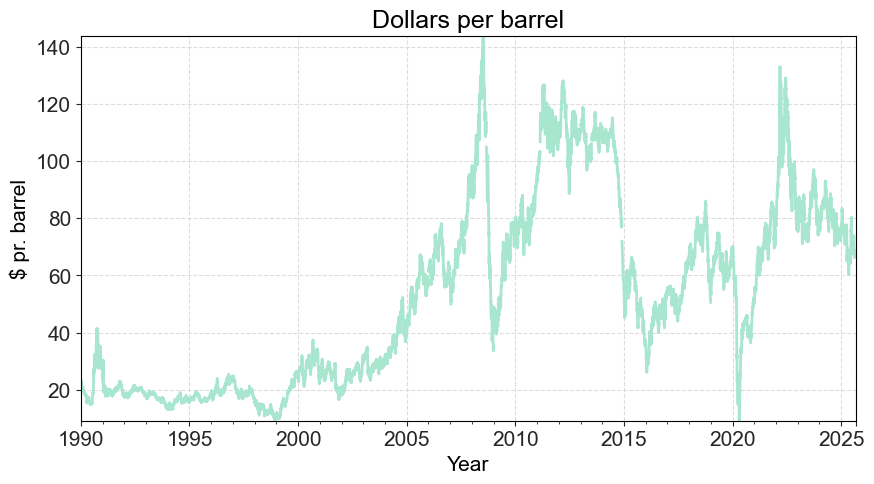

In [12]:
from pandas_datareader.data import DataReader
from pandas_datareader.fred import FredReader

start = datetime.date(1990, 1, 1)
# Set series code
series = 'DCOILBRENTEU'

# Import the data
oil_price = DataReader(series, 'fred', start=start)
# or FredReader(series, start=start).read()

# Inspect the price of gold
oil_price.info()

# Plot the price of gold
oil_price.plot(title="Dollars per barrel", figsize=(10, 5),
                legend=False,
                xlabel="Year",
                ylabel="$ pr. barrel"); 

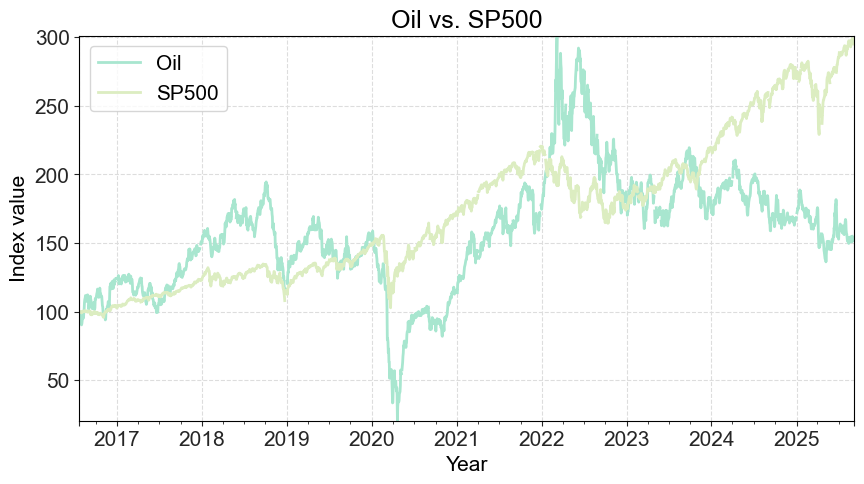

In [14]:
start = datetime.date(2016, 7, 22) # SP500 only available after this date (may be updated)

# Set series codes
series = ['DCOILBRENTEU', 'SP500']

# Import the data
prices = DataReader(series, 'fred', start=start)
prices.columns = ['Oil', 'SP500']
prices = prices / prices.iloc[0, :] * 100 # normalize base year

# Plot the price of gold
ax = prices.plot(title="Oil vs. SP500", figsize=(10, 5), xlabel="Year"); 
ax.set_ylabel('Index value'); 

## Kenneth R. French's data library

[Kenneth R. French provides a comprehensive data library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) that is accessible using `pandas-datareader` (the documentation can be found [here](https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html)). 

In [15]:
from pandas_datareader.famafrench import FamaFrenchReader, get_available_datasets

"""
Show available data sets
"""

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [16]:
"""
Get the 49 industry portfolios
"""

reader = FamaFrenchReader("49_Industry_Portfolios_daily",
                          start=datetime.datetime(1950, 1, 1))

industry_port_daily = reader.read()

# print description
industry_port_daily['DESCR']

C:\Users\johan\AppData\Local\Temp\ipykernel_18304\2433466609.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port_daily = reader.read()
C:\Users\johan\AppData\Local\Temp\ipykernel_18304\2433466609.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port_daily = reader.read()


'49 Industry Portfolios daily\n----------------------------\n\nThis file was created using the 202506 CRSP database. It contains value- and equal-weighted returns for 49 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2025 Eugene F. Fama and Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Daily (19060 rows x 49 cols)\n  1 : Average Equal Weighted Returns -- Daily (19060 rows x 49 cols)'

In [17]:
# get equally weighted
ind_eq_weighted = industry_port_daily[1]

# get market cap weighted 
ind_mc_weighted = industry_port_daily[0] 

# Remove whitespace form column names
ind_eq_weighted.columns = [_.strip() for _ in ind_eq_weighted.columns]
ind_mc_weighted.columns = [_.strip() for _ in ind_mc_weighted.columns]

In [18]:
ind_eq_weighted.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1.47,-0.10,-99.99,-0.92,0.25,-1.30,-0.79,1.68,0.54,-0.10,...,0.23,0.29,-1.53,0.02,0.26,-0.41,-0.53,0.32,-0.29,-0.32
1950-01-04,1.97,0.93,-99.99,2.05,0.70,2.40,1.36,1.82,1.10,0.33,...,0.83,3.30,0.90,1.01,-0.42,0.50,-0.21,1.28,0.94,0.07
1950-01-05,3.91,1.26,-99.99,0.13,1.15,0.78,0.83,0.65,1.23,1.42,...,0.58,0.31,0.93,0.93,0.04,0.65,0.36,0.49,1.33,0.59
1950-01-06,-0.79,1.34,-99.99,0.92,0.05,1.64,-0.09,0.70,0.20,0.27,...,0.12,1.02,0.39,0.64,0.84,-0.14,0.04,0.08,-0.49,0.08
1950-01-07,-3.11,1.20,-99.99,0.87,0.56,0.08,0.65,0.17,0.70,1.02,...,1.13,0.62,2.13,1.03,1.82,0.23,0.18,0.40,1.15,0.30


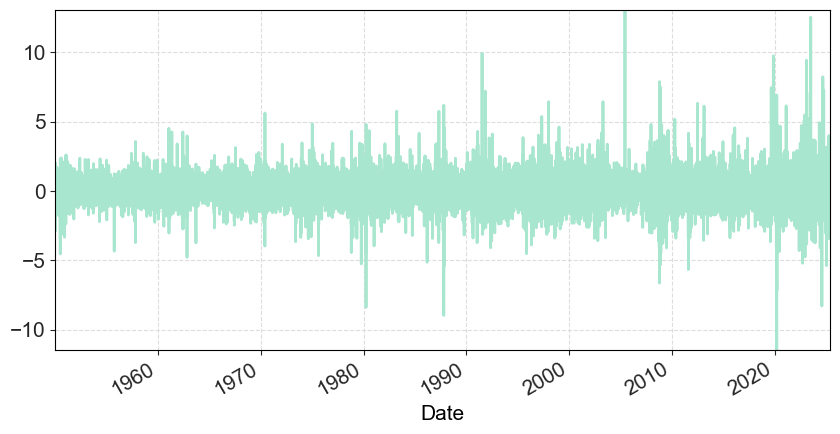

In [19]:
ind_eq_weighted['Beer'].plot(figsize=(10, 5)); 

# Yahoo Finance

`yfinance` provides access to download data from [Yahoo Finance](https://finance.yahoo.com/). We will mainly use Yahoo Finance for individual stock data. 

### Stock data

In [20]:
import yfinance as yf 

In [21]:
"""
Get google stock price
"""

goog = yf.download('GOOG', start=datetime.date(2020, 1, 1))
goog.head(10)

C:\Users\johan\AppData\Local\Temp\ipykernel_18304\356388368.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  goog = yf.download('GOOG',start=datetime.date(2020, 1, 1))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2020-01-02,67.964508,68.002778,66.681136,66.681136,28132000
2020-01-03,67.630981,68.219486,66.879649,66.994764,23728000
2020-01-06,69.298584,69.412402,67.101143,67.101143,34646000
2020-01-07,69.255341,69.734988,69.108212,69.483985,30054000
2020-01-08,69.801094,70.161948,69.131073,69.192703,30560000
2020-01-09,70.572014,70.944798,70.096834,70.608798,30018000
2020-01-10,71.064087,71.322500,70.498449,70.956223,36414000
2020-01-13,71.536278,71.600396,70.879681,71.382195,33046000


C:\Users\johan\AppData\Local\Temp\ipykernel_18304\1979514200.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang = yf.download(tickers, start=datetime.date(2020, 1, 1))
[*********************100%***********************]  5 of 5 completed


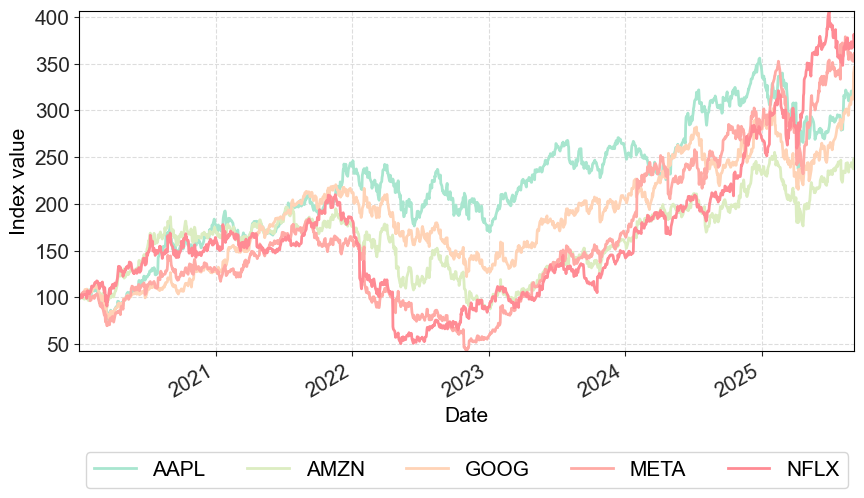

In [22]:
"""
Get adjusted stock prices for Facebook (META), Amazon (AMZN), Apple (AAPL), 
Netflix (NFLX), and Alphabet (GOOG).
"""
tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
faang = yf.download(tickers, start=datetime.date(2020, 1, 1))

"""
Get adjusted close and normalize
"""
faang_adj_close = faang['Close']
faang_adj_close = faang_adj_close / faang_adj_close.iloc[0, :] * 100

"""
Plot stock prices
"""

ax = faang_adj_close.plot(figsize=(10, 5)); 
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.35), ncol=5); 
ax.set_ylabel('Index value');

### FX data

In [23]:
"""
Get FX data 
"""

tickers = ['DKKUSD=X', 'EURUSD=X', 'NOKUSD=X', 'SEKUSD=X']
fx_data = yf.download(tickers, start=datetime.date(2020, 1, 1))

fx_data.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_18304\3505269137.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx_data = yf.download(tickers, start=datetime.date(2020, 1, 1))
[*********************100%***********************]  4 of 4 completed


Price          Close                                    High            \
Ticker      DKKUSD=X  EURUSD=X  NOKUSD=X  SEKUSD=X  DKKUSD=X  EURUSD=X   
Date                                                                     
2020-01-01  0.150089  1.122083  0.119659  0.109042  0.150101  1.122838   
2020-01-02  0.150177  1.122083  0.114025  0.107073  0.150263  1.122712   
2020-01-03  0.149495  1.117144  0.113754  0.106822  0.149624  1.118068   
2020-01-06  0.149359  1.116196  0.113196  0.106274  0.149943  1.120825   
2020-01-07  0.149813  1.119799  0.113746  0.106343  0.149833  1.119946   

Price                                Low                                \
Ticker      NOKUSD=X  SEKUSD=X  DKKUSD=X  EURUSD=X  NOKUSD=X  SEKUSD=X   
Date                                                                     
2020-01-01  0.120970  0.109441  0.150065  1.115947  0.119658  0.108440   
2020-01-02  0.114223  0.107308  0.149430  1.116682  0.113481  0.106674   
2020-01-03  0.113774  0.106956  0.148880  1.112570  0.112950  0.105727   
2020-01-06  0.113804  0.106546  0.149310  1.115810  0.112968  0.106043   
2020-01-07  0.113948  0.106513  0.148997  1.113487  0.112833  0.105669   

Price           Open                                 Volume                    \
Ticker      DKKUSD=X  EURUSD=X  NOKUSD=X  SEKUSD=X DKKUSD=X EURUSD=X NOKUSD=X   
Date                                                                            
2020-01-01  0.150087  1.122083  0.119659  0.109050      0.0      0.0        0   
2020-01-02  0.150177  1.121894  0.114021  0.107015      0.0      0.0        0   
2020-01-03  0.149499  1.117081  0.113723  0.106768      0.0      0.0        0   
2020-01-06  0.149369  1.116246  0.113205  0.106277      0.0      0.0        0   
2020-01-07  0.149812  1.119583  0.113754  0.106375      0.0      0.0        0   

Price                
Ticker     SEKUSD=X  
Date                 
2020-01-01        0  
2020-01-02        0  
2020-01-03        0  
2020-01-06        0  
2020-01-07        0

In [24]:
"""
Unstack data
"""

fx_close = fx_data['Close']
fx_close.head()

fx_close.columns = [c[:-2] for c in fx_close.columns]

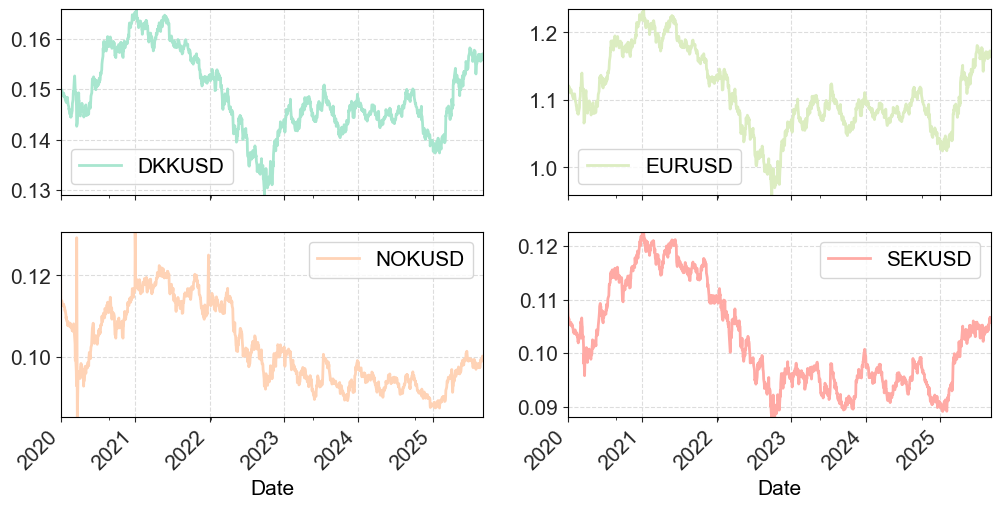

In [25]:
"""
Plot FX data
"""

fx_close.plot(figsize=(12, 6), subplots=True, layout=(2, 2), rot=45); 

# Yield curve data, the term structure of interest rates 

[Federal reserve](https://www.federalreserve.gov/data/yield-curve-models.htm) provides yield curve data for the nominal U.S. yield curve and the TIPS yield curve. These data sets have been used extensively in empirical research. 


### Nominal U.S. yield curve

In the paper [The U.S. Treasury yield curve: 1961 to the present](https://www.sciencedirect.com/science/article/pii/S0304393207000840) Gürkaynaka, Sack and Wright provide daily yield curve estimates that are updated regularly. 

They apply the [Svensson (1994)](https://www.nber.org/papers/w4871) methodology (an extension of [Nelson and Siegel (1987)](https://www.jstor.org/stable/2352957?seq=1&cid=pdf-reference)) to interpolate the yield curve. Basically, the model specify the instantaneous forward rate as 

$$
f_t = \beta_0 + \beta_1 \exp (-t/{\tau_1}) + \beta_2 (-t/{\tau_1}) \exp (-t/{\tau_1}) + \beta_3 (-t/{\tau_2}) \exp (-t/{\tau_2})
$$

and thereby also the zero-coupon yield curve. We will discuss this in more detail later in the course. 

The data set is located in `..\..\..\data\feds200628.csv` (updated 09.09.2023)



In [ ]:
"""
We need to import the following packages (I have already done so in the top of this notebook): 

import pandas as pd 

for additional information one can use e.g. 

?pd.read_csv or shift + tab
"""

yield_data = pd.read_csv("../../../data/feds200628.csv", skiprows=9,
                         index_col=0, parse_dates=True)
yield_data.head()

In [ ]:
"""
Extract zero yields, par yields, etc. 
"""

# get parameters
parameters = yield_data[['BETA0', 'BETA1', 'BETA2', 'BETA3', 'TAU1', 'TAU2']]

# get zero yields
not_zero_yield_cols = [c for c in yield_data.columns if c.lower()[:5] != 'sveny']
zero_yields = yield_data.drop(not_zero_yield_cols, axis=1)

# get par yields
not_par_yield_cols = [c for c in yield_data.columns if c.lower()[:6] != 'svenpy']
par_yields = yield_data.drop(not_par_yield_cols, axis=1)

# get instantaneous forward rates
not_inst_forward_cols = [c for c in yield_data.columns if c.lower()[:5] != 'svenf']
instaneous_forward_rate = yield_data.drop(not_inst_forward_cols, axis=1)

# get one year forward rates
not_one_year_forward_cols = [c for c in yield_data.columns if c.lower()[:6] != 'sven1f']
one_year_forward_rate = yield_data.drop(not_one_year_forward_cols, axis=1)

In [ ]:
"""
Plot the 1Y, 5Y, 10Y, 15Y, 20Y, 30Y zero yields
"""

zero_yields[['SVENY01', 'SVENY05', 'SVENY10',
             'SVENY15', 'SVENY20', 'SVENY30']].plot(figsize=(12, 6));

plt.ylabel('Yield (in %)', size='15')
plt.xlabel('')
plt.title("Zero coupon yields", size=15);
plt.legend(bbox_to_anchor=(1.1, -0.1), ncol= 6);

### Real U.S. yield curve

In the paper [The TIPS Yield Curve and Inflation Compensation](https://www.jstor.org/stable/25760285) (see also this [version](https://www.federalreserve.gov/pubs/feds/2008/200805/200805pap.pdf)) Gürkaynaka, Sack and Wright provide TIPS (Treasury Inflation-Protected Securities) yield curves estimates that are updated regularly. 

The same methodology as for the nominal yield curve is applied.  

The data set is located in `..\..\..\data\feds200805.csv` 


In [ ]:
real_yield_data = pd.read_csv("../../../data/feds200805.csv", skiprows=18,
                              index_col=0, parse_dates=True)
real_yield_data.head()

In [ ]:
parameters = real_yield_data[['BETA0', 'BETA1', 'BETA2', 'BETA3', 'TAU1', 'TAU2']]

"""
Yields
"""

not_zero_yield_cols = [c for c in real_yield_data.columns if c.lower()[:5] != 'tipsy']
zero_yields = real_yield_data.drop(not_zero_yield_cols, axis=1)

not_par_yield_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'tipspy']
par_yields = real_yield_data.drop(not_par_yield_cols, axis=1)

not_inst_forward_cols = [c for c in real_yield_data.columns if c.lower()[:5] != 'tipsf']
instaneous_forward_rate = real_yield_data.drop(not_inst_forward_cols, axis=1)

not_one_year_forward_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'tips1f']
one_year_forward_rate = real_yield_data.drop(not_one_year_forward_cols, axis=1)

not_five_year_forward_cols = [c for c in real_yield_data.columns if c.lower()[:7] != 'tips5f5']
five_year_forward_rate = real_yield_data.drop(not_five_year_forward_cols, axis=1)

"""
Inflation compensation 
"""

not_beir_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'bkeven']
beir = real_yield_data.drop(not_beir_cols, axis=1)

not_par_beir_cols = [c for c in real_yield_data.columns if c.lower()[:8] != 'bkevenpy']
par_beir = real_yield_data.drop(not_par_beir_cols, axis=1)

not_inst_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:7] != 'bkevenf']
instaneous_forward_beir_rate = real_yield_data.drop(not_inst_forward_beir_cols, axis=1)

not_one_year_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:8] != 'bkeven1f']
one_year_forward_beir_rate = real_yield_data.drop(not_one_year_forward_beir_cols, axis=1)

not_five_year_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:9] != 'bkeven5f5']
five_year_forward_beir_rate = real_yield_data.drop(not_five_year_forward_beir_cols, axis=1)

In [ ]:
zero_yields[['TIPSY05', 'TIPSY10', 'TIPSY15', 'TIPSY20']].plot(figsize=(12, 6));
plt.ylabel('Yield (in %)', size='15')
plt.xlabel('')
plt.title("Real zero coupon yields", size=15);
plt.legend(bbox_to_anchor=(0.9, -0.1), ncol= 4);

### Codelib functions

In [29]:
# load function from corelib
from codelib.dal.fred_yield_data import get_nominal_yield_data

# load data 
df_par_yields = get_nominal_yield_data(output_type='par_yields')

In [31]:
df_par_yields.tail()

,SVENPY01,SVENPY02,SVENPY03,SVENPY04,SVENPY05,SVENPY06,SVENPY07,SVENPY08,SVENPY09,SVENPY10,...,SVENPY21,SVENPY22,SVENPY23,SVENPY24,SVENPY25,SVENPY26,SVENPY27,SVENPY28,SVENPY29,SVENPY30
Date,,,,,,,,,,,,,,,,,,,,,
2025-08-25,3.9103,3.7307,3.6896,3.7259,3.8035,3.9012,4.0064,4.1115,4.2123,4.3065,...,4.8602,4.8778,4.8920,4.9031,4.9115,4.9176,4.9215,4.9235,4.9239,4.9229
2025-08-26,3.8763,3.6754,3.6313,3.6716,3.7556,3.8598,3.9708,4.0812,4.1865,4.2847,...,4.8633,4.8822,4.8977,4.9101,4.9196,4.9268,4.9317,4.9348,4.9361,4.9360
2025-08-27,3.8654,3.6526,3.6026,3.6411,3.7257,3.8321,3.9461,4.0597,4.1685,4.2699,...,4.8692,4.8888,4.9049,4.9177,4.9276,4.9350,4.9402,4.9433,4.9447,4.9446
2025-08-28,3.8752,3.6644,3.6074,3.6371,3.7140,3.8143,3.9239,4.0345,4.1412,4.2412,...,4.8349,4.8540,4.8695,4.8816,4.8909,4.8976,4.9021,4.9045,4.9052,4.9043
2025-08-29,3.8501,3.6398,3.5885,3.6251,3.7084,3.8142,3.9285,4.0428,4.1527,4.2554,...,4.8665,4.8866,4.9031,4.9163,4.9266,4.9343,4.9396,4.9430,4.9445,4.9444


# Measures of realized variance (discontinued)

[Oxford-Man Institute's "realised library"](https://realized.oxford-man.ox.ac.uk/) contains daily non-parametric measures of financial market volatility. 

The different estimators of the realized variance is given below

 <section id="content" class="body">
        <table cellpadding="0" cellspacing="0" border="0" class="table table-responsive table-striped table-hover table-sm" id="list-of-estimators">
            <colgroup>
                <col class="latest-values-column">
                <col class="latest-values-column-wide">
            </colgroup>
            <thead>
            <tr>
                <th rowspan="1" colspan="1">Code
                </th>
                <th rowspan="1" colspan="1">Description
                </th>
            </tr>
            </thead>
            <tbody>
                    <tr class="odd">
                        <td>bv</td>
                        <td>Bipower Variation (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>bv_ss</td>
                        <td>Bipower Variation (5-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>close_price</td>
                        <td>Closing (Last) Price</td>
                    </tr>
                    <tr class="even">
                        <td>close_time</td>
                        <td>Closing Time</td>
                    </tr>
                    <tr class="odd">
                        <td>medrv</td>
                        <td>Median Realized Variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>nobs</td>
                        <td>Number of Observations</td>
                    </tr>
                    <tr class="odd">
                        <td>open_price</td>
                        <td>Opening (First) Price</td>
                    </tr>
                    <tr class="even">
                        <td>open_time</td>
                        <td>Opening Time</td>
                    </tr>
                    <tr class="odd">
                        <td>open_to_close</td>
                        <td>Open to Close Return</td>
                    </tr>
                    <tr class="even">
                        <td>rk_parzen</td>
                        <td>Realized Kernel Variance (Non-Flat Parzen)</td>
                    </tr>
                    <tr class="odd">
                        <td>rk_th2</td>
                        <td>Realized Kernel Variance (Tukey-Hanning(2))</td>
                    </tr>
                    <tr class="even">
                        <td>rk_twoscale</td>
                        <td>Realized Kernel Variance (Two-Scale/Bartlett)</td>
                    </tr>
                    <tr class="odd">
                        <td>rsv</td>
                        <td>Realized Semi-variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rsv_ss</td>
                        <td>Realized Semi-variance (5-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>rv10</td>
                        <td>Realized Variance (10-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rv10_ss</td>
                        <td>Realized Variance (10-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>rv5</td>
                        <td>Realized Variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rv5_ss</td>
                        <td>Realized Variance (5-min Sub-sampled)</td>
                    </tr>
            </tbody>
        </table>
    </section>

The data set is located in `..\..\..\data\oxfordmanrealizedvolatilityindices.csv` (updated 2021-07-23). 

In [32]:
realized_volatility = pd.read_csv("../../../data/oxfordmanrealizedvolatilityindices.csv",
                                  skiprows=0, index_col=0, parse_dates=True)
realized_volatility.head()

,Symbol,rk_th2,medrv,rsv,rv5,open_to_close,open_price,nobs,rk_twoscale,close_price,rsv_ss,bv_ss,rk_parzen,bv,rv10,rv10_ss,close_time,open_time,rv5_ss
2000-01-03 00:00:00+00:00,.AEX,0.000102,0.000050,0.000046,0.000130,-0.000340,675.67,1795.0,0.000103,675.44,0.000046,0.000100,0.000179,0.000100,0.000178,0.000178,163015.0,90101.0,0.000130
2000-01-04 00:00:00+00:00,.AEX,0.000201,0.000075,0.000147,0.000201,-0.033606,664.20,1785.0,0.000199,642.25,0.000147,0.000207,0.000423,0.000207,0.000261,0.000261,163016.0,90416.0,0.000201
2000-01-05 00:00:00+00:00,.AEX,0.000345,0.000166,0.000328,0.000491,-0.001675,633.37,1801.0,0.000325,632.31,0.000328,0.000361,0.000324,0.000361,0.000714,0.000714,163016.0,90016.0,0.000491
2000-01-06 00:00:00+00:00,.AEX,0.000221,0.000152,0.000116,0.000225,-0.013130,632.46,1799.0,0.000218,624.21,0.000116,0.000258,0.000219,0.000258,0.000182,0.000182,163002.0,90016.0,0.000225
2000-01-07 00:00:00+00:00,.AEX,0.000123,0.000039,0.000048,0.000138,0.025013,628.93,1798.0,0.000126,644.86,0.000048,0.000130,0.000155,0.000130,0.000157,0.000157,163016.0,90046.0,0.000138


In [33]:
"""
Available tickers
"""

realized_volatility['Symbol'].unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

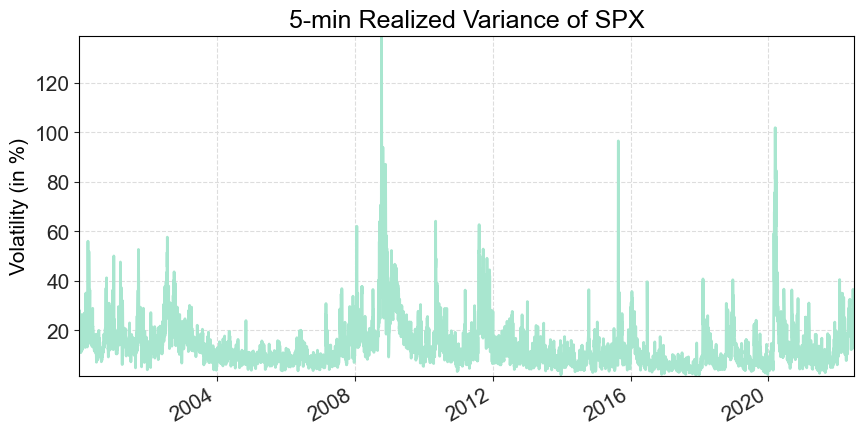

In [34]:
"""
Plot 5-min Realized Variance for SPX
"""

spx_rv5 = realized_volatility[realized_volatility['Symbol'] =='.SPX']['rv5']

# annualize, turn in pct, standard deviation
spx_rv5 = np.sqrt(spx_rv5 * 100 * 100) * np.sqrt(250)

ax = spx_rv5.plot(figsize=(10, 5), title="5-min Realized Variance of SPX")
ax.set_ylabel('Volatility (in %)'); 

# Wharton Research Data Services (WRDS)

Wharton Research Data Services (WRDS) provides the leading business intelligence, data analytics, and research platform to global institutions—enabling historical analysis and insight into the latest innovations in academic research. See more here https://wrds-www.wharton.upenn.edu/.

CBS students can follow [this guide](https://www.cbs.dk/node/245317) to obtain access to a number of databases with financial data. 

WRDS has created a Python-package which makes it very easy to obtain data for academic research. The package is named `wrds` (see documentation [here](https://pypi.org/project/wrds/)). 

Examples on how to replicate different academic papers can be found [here](https://wrds-www.wharton.upenn.edu/pages/support/applications/python-replications/). 

In [35]:
import wrds

In [37]:
"""
Connecting to WRDS
"""

db = wrds.Connection(wrds_username='johanstax') # use your own username! first time you will be prompted for password.

Loading library list...
Done


In [38]:
"""
Get data using SQL-query

Dow-Jones, daily index values

See https://wrds-www.wharton.upenn.edu/pages/get-data/dow-jones-averages-total-return-indexes/dow-jones-daily/
for more information
"""

db.raw_sql("""SELECT date, dji
              FROM djones.djdaily""")

,date,dji
0,1896-05-26,40.94
1,1896-05-27,40.58
2,1896-05-28,40.2
3,1896-05-29,40.63
4,1896-06-01,40.6
...,...,...
28068,2008-06-13,12307.35
28069,2008-06-16,12269.08
28070,2008-06-17,12160.3
28071,2008-06-18,12029.06


In [39]:
"""
Close connection
"""

db.close()

# References

## Articles

 [Gürkaynaka, Sack and Wright (2007), The U.S. Treasury yield curve: 1961 to the present](https://www.sciencedirect.com/science/article/pii/S0304393207000840) 
 
 [Gürkaynaka, Sack and Wright (2010), The TIPS Yield Curve and Inflation Compensation](https://www.jstor.org/stable/25760285)
 
[Svensson (1994), Estimating and Interpreting Forward Interest Rates: Sweden 1992 - 1994](https://www.nber.org/papers/w4871)

[Nelson and Siegel (1987), Parsimonious Modeling of Yield Curves](https://www.jstor.org/stable/2352957?seq=1&cid=pdf-reference)